In [1]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys
import tqdm
from pathlib import Path

In [2]:
results_path = "../../benchmark"
full_results_df = pd.DataFrame()

In [3]:
# For all folder in results_path
for experiment_folder in os.listdir(results_path):
    # Load the data
    for dataset_folder in os.listdir(os.path.join(results_path, experiment_folder)):
        try:
            dataset_results = pd.read_csv(Path(results_path, experiment_folder,dataset_folder, "model_metrics.csv"))
        except:
            print(f"Error loading {results_path}/{experiment_folder}/{dataset_folder}/model_metrics.csv")
            continue
        dataset_results["experiment"] = experiment_folder
        dataset_results["dataset_name"] = "_".join(dataset_folder.split("_")[:-1])
        dataset_results['dataset_version'] = dataset_folder.split("_")[-1]
        full_results_df = pd.concat([full_results_df, dataset_results])


Error loading ../results/epxlainability_benchamrk/DTECategorical_dataset_sampling_deterministic_0.5_s0/synthetic_f10_s5000_c4_r0.0175_0.0175_0.0175_v4/model_metrics.csv
Error loading ../results/epxlainability_benchamrk/DTECategorical_dataset_sampling_deterministic_exponential_s0/synthetic_f10_s5000_c4_r0.0175_0.0175_0.0175_v2/model_metrics.csv
Error loading ../results/epxlainability_benchamrk/DTECategorical_dataset_sampling_deterministic_cosine_s0/synthetic_f10_s5000_c4_r0.0175_0.0175_0.0175_v3/model_metrics.csv
Error loading ../results/epxlainability_benchamrk/DTECategorical_unsupervised_None_s0/synthetic_f10_s5000_c4_r0.0175_0.0175_0.0175_v4/model_metrics.csv


In [4]:
full_results_df = full_results_df.drop(columns=["Unnamed: 0", "model_name", "sampling_method"], )
full_results_df.head()

,training_time,inference_time,f1_score,dataset_name,training_method,random_seed,aucroc,feature_importance_ndcg,shap_feature_importance_ndcg,global_explanation_time,local_explanation_time,shap_explanation_time,experiment,dataset_version
0,350.588165,0.055310,0.737143,synthetic_f4_s5000_c2_r0.05_0.05,dataset_sampling,0,0.894189,0.728189,0.729397,7.643598,127.282323,143.261555,DTECategorical_dataset_sampling_deterministic_...,v3
0,363.094016,0.046633,0.661429,synthetic_f4_s5000_c2_r0.05_0.05,dataset_sampling,0,0.858543,0.643016,0.644302,4.450933,135.875905,158.231997,DTECategorical_dataset_sampling_deterministic_...,v0
0,290.052167,0.026144,0.794286,synthetic_f4_s5000_c2_r0.025_0.025,dataset_sampling,0,0.926327,0.793231,0.792704,3.721930,102.719714,112.574678,DTECategorical_dataset_sampling_deterministic_...,v4
0,373.269894,0.037858,0.773333,synthetic_f10_s5000_c4_r0.0175_0.0175_0.0175,dataset_sampling,0,0.924215,0.746779,0.741632,38.538705,194.998819,1335.070423,DTECategorical_dataset_sampling_deterministic_...,v0
0,371.079920,0.033772,0.801905,synthetic_f10_s5000_c4_r0.0175_0.0175_0.0175,dataset_sampling,0,0.932740,0.741437,0.749668,46.165231,180.088559,1326.942271,DTECategorical_dataset_sampling_deterministic_...,v1


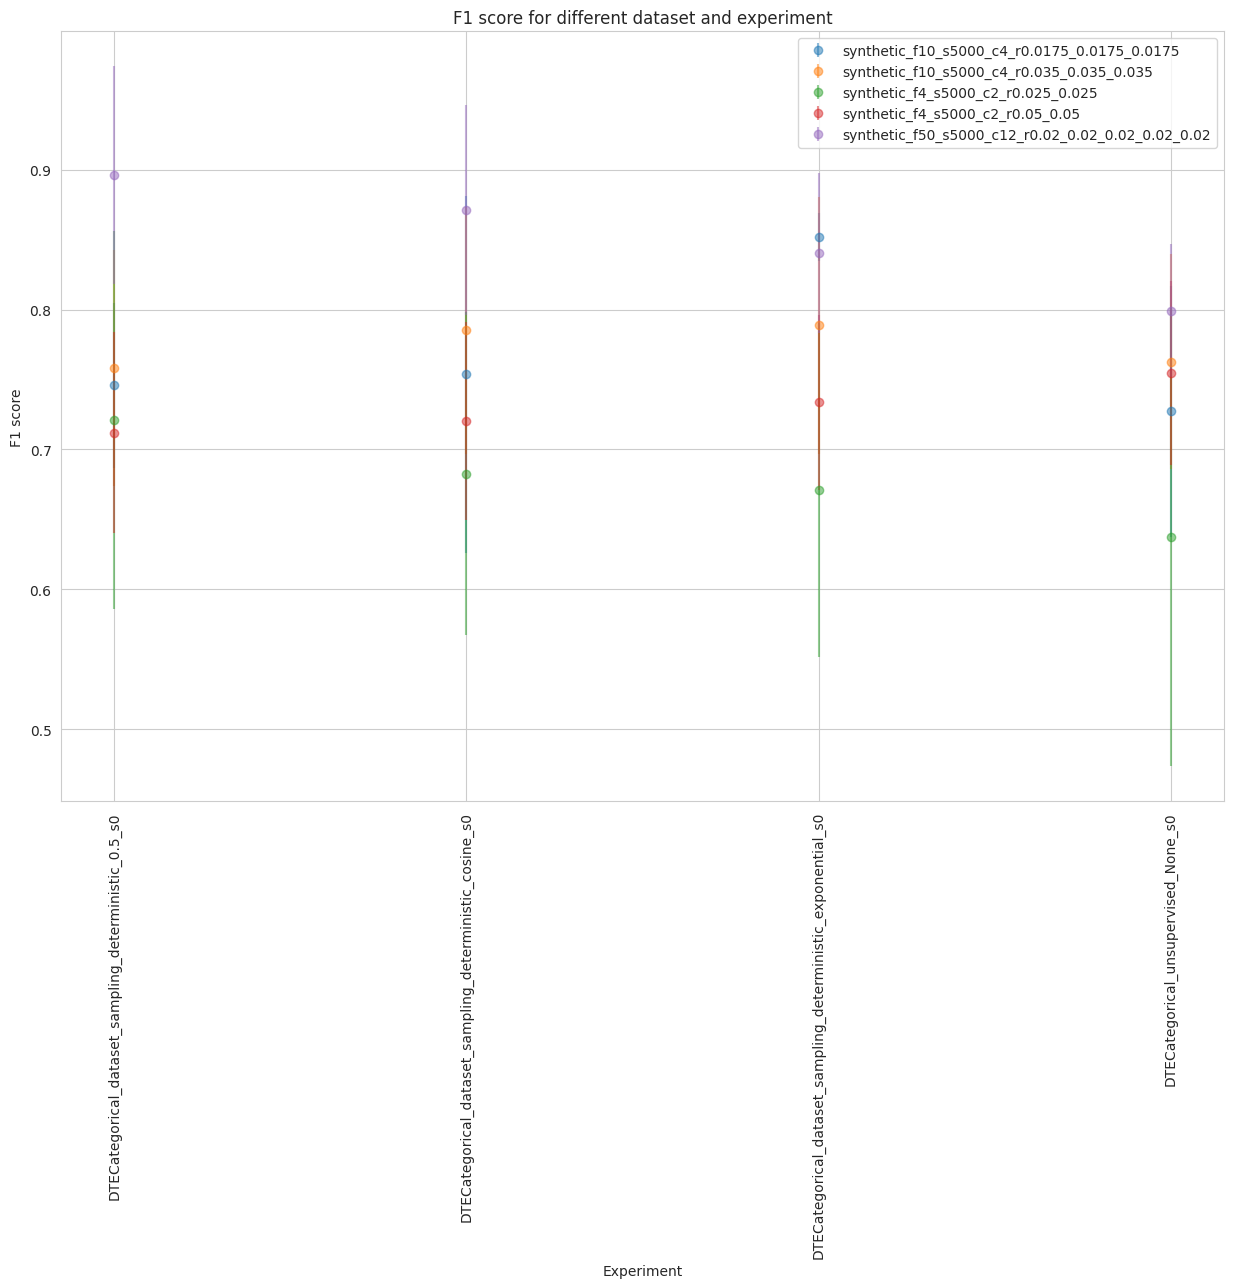

In [5]:
# Compute mean and std for each dataset with different version, but same experiment name
temp_df = full_results_df.drop(columns=['training_method', "dataset_version"])
mean_df = temp_df.groupby(["experiment", "dataset_name"]).mean().reset_index()
std_df = temp_df.groupby(["experiment", "dataset_name"]).std().reset_index()

# Display the results with one color for each dataset, and one line for each experiment
sns.set_style("whitegrid")
plt.figure(figsize=(15, 10))
for i, dataset_name in enumerate(mean_df["dataset_name"].unique()):
    dataset_mean = mean_df[mean_df["dataset_name"] == dataset_name]
    dataset_std = std_df[std_df["dataset_name"] == dataset_name]
    for j, experiment_name in enumerate(dataset_mean["experiment"].unique()):
        experiment_mean = dataset_mean[dataset_mean["experiment"] == experiment_name]
        experiment_std = dataset_std[dataset_std["experiment"] == experiment_name]
        label = dataset_name if j == 0 else None
        plt.errorbar(experiment_mean["experiment"], experiment_mean["f1_score"], yerr=experiment_std["f1_score"], label=label, fmt='o', color=sns.color_palette()[i], alpha=0.5)
plt.legend()
plt.title("F1 score for different dataset and experiment")
plt.xticks(rotation=90)
plt.xlabel("Experiment")
plt.ylabel("F1 score")
plt.show()

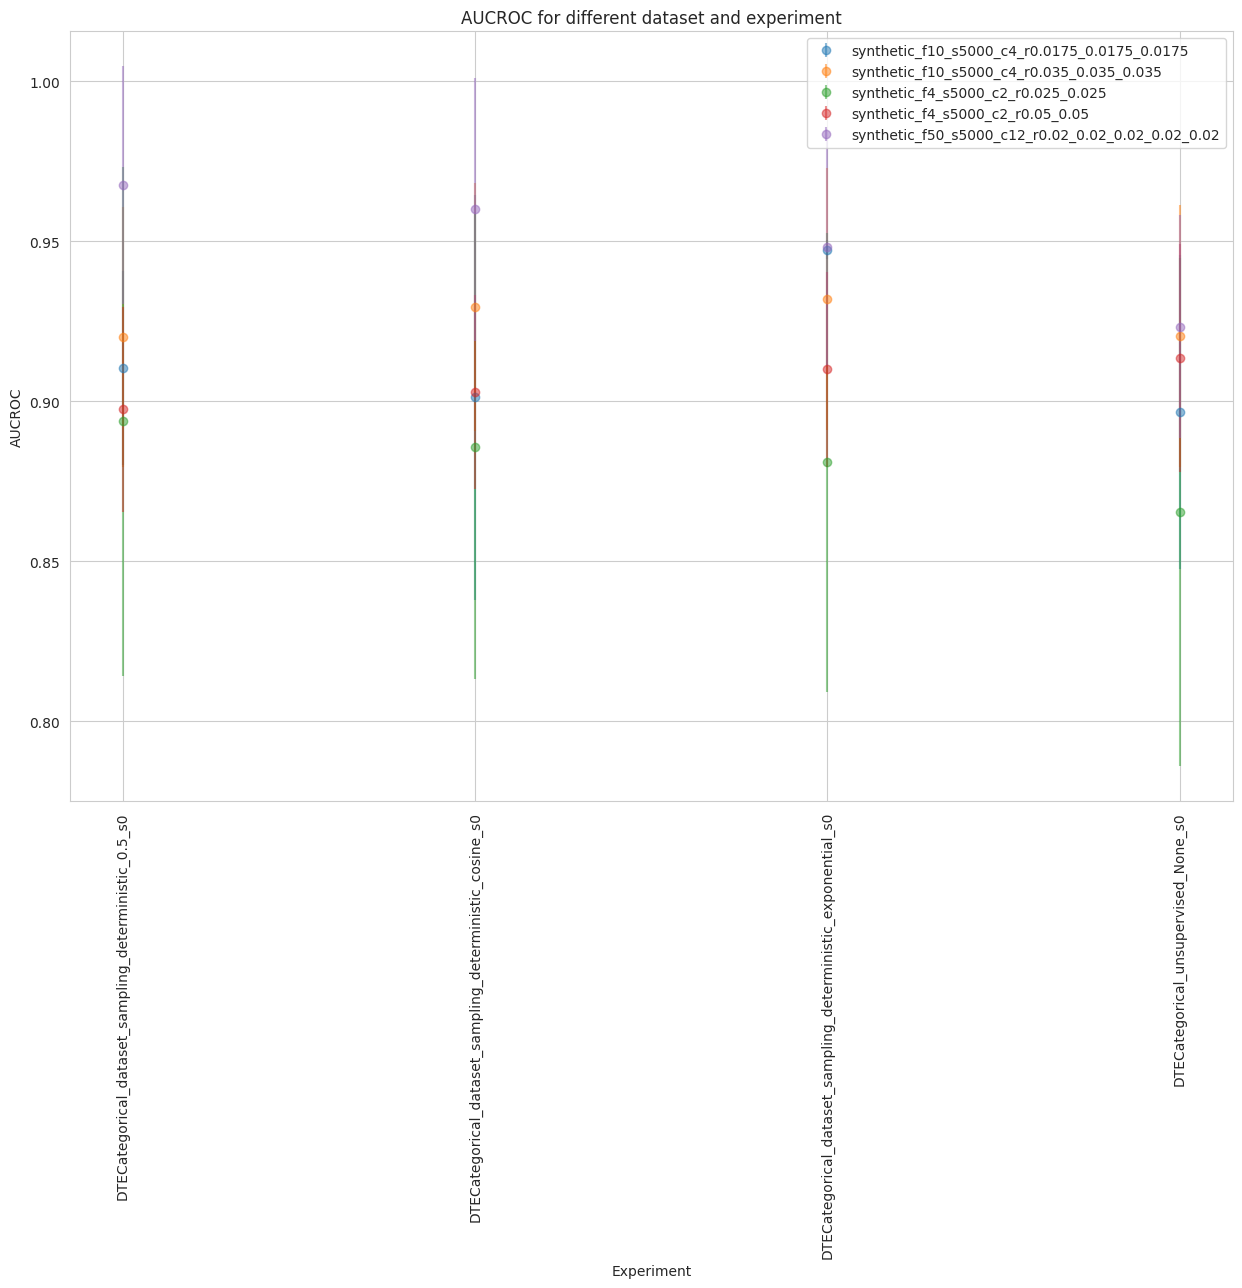

In [6]:
# Compute mean and std for each dataset with different version, but same experiment name
mean_df = temp_df.groupby(["experiment", "dataset_name"]).mean().reset_index()
std_df = temp_df.groupby(["experiment", "dataset_name"]).std().reset_index()

# Display the results with one color for each dataset, and one line for each experiment
sns.set_style("whitegrid")
plt.figure(figsize=(15, 10))
for i, dataset_name in enumerate(mean_df["dataset_name"].unique()):
    dataset_mean = mean_df[mean_df["dataset_name"] == dataset_name]
    dataset_std = std_df[std_df["dataset_name"] == dataset_name]
    for j, experiment_name in enumerate(dataset_mean["experiment"].unique()):
        experiment_mean = dataset_mean[dataset_mean["experiment"] == experiment_name]
        experiment_std = dataset_std[dataset_std["experiment"] == experiment_name]
        label = dataset_name if j == 0 else None
        plt.errorbar(experiment_mean["experiment"], experiment_mean["aucroc"], yerr=experiment_std["aucroc"], label=label, fmt='o', color=sns.color_palette()[i], alpha=0.5, )
plt.legend()
plt.title("AUCROC for different dataset and experiment")
plt.xticks(rotation=90)
plt.xlabel("Experiment")
plt.ylabel("AUCROC")
plt.show()

In [7]:
mean_df

,experiment,dataset_name,training_time,inference_time,f1_score,random_seed,aucroc,feature_importance_ndcg,shap_feature_importance_ndcg,global_explanation_time,local_explanation_time,shap_explanation_time
0,DTECategorical_dataset_sampling_deterministic_...,synthetic_f10_s5000_c4_r0.0175_0.0175_0.0175,357.878068,0.042000,0.745714,0.0,0.910399,0.663106,0.706133,48.151630,183.932549,1328.115891
1,DTECategorical_dataset_sampling_deterministic_...,synthetic_f10_s5000_c4_r0.035_0.035_0.035,344.309309,0.039316,0.758095,0.0,0.919961,0.687325,0.706280,47.666817,182.327230,1316.250551
2,DTECategorical_dataset_sampling_deterministic_...,synthetic_f4_s5000_c2_r0.025_0.025,335.345519,0.041259,0.721143,0.0,0.893779,0.714036,0.712602,5.861413,123.322146,143.027322
3,DTECategorical_dataset_sampling_deterministic_...,synthetic_f4_s5000_c2_r0.05_0.05,331.728575,0.042518,0.712000,0.0,0.897475,0.701040,0.698567,5.989857,127.162603,144.030822
4,DTECategorical_dataset_sampling_deterministic_...,synthetic_f50_s5000_c12_r0.02_0.02_0.02_0.02_0.02,332.027965,0.042895,0.896114,0.0,0.967517,0.773445,0.822766,36.165571,544.334506,2593.102283
5,DTECategorical_dataset_sampling_deterministic_...,synthetic_f10_s5000_c4_r0.0175_0.0175_0.0175,453.030012,0.048328,0.753651,0.0,0.901210,0.680921,0.700215,54.527068,180.216272,1328.061322
6,DTECategorical_dataset_sampling_deterministic_...,synthetic_f10_s5000_c4_r0.035_0.035_0.035,438.207022,0.039285,0.785143,0.0,0.929467,0.709407,0.730849,45.863085,173.294027,1203.211869
7,DTECategorical_dataset_sampling_deterministic_...,synthetic_f4_s5000_c2_r0.025_0.025,447.557006,0.046046,0.682571,0.0,0.885869,0.637565,0.674344,6.154313,123.830419,136.401783
8,DTECategorical_dataset_sampling_deterministic_...,synthetic_f4_s5000_c2_r0.05_0.05,444.325952,0.039967,0.720286,0.0,0.902902,0.709257,0.707189,6.311579,124.473022,139.831157
9,DTECategorical_dataset_sampling_deterministic_...,synthetic_f50_s5000_c12_r0.02_0.02_0.02_0.02_0.02,399.702670,0.040222,0.871086,0.0,0.960055,0.715091,0.777491,32.066852,489.844134,2319.310414


([0, 1, 2, 3, 4],
 [Text(0, 0, 'synthetic_f10_s5000_c4_r0.0175_0.0175_0.0175'),
  Text(1, 0, 'synthetic_f10_s5000_c4_r0.035_0.035_0.035'),
  Text(2, 0, 'synthetic_f4_s5000_c2_r0.025_0.025'),
  Text(3, 0, 'synthetic_f4_s5000_c2_r0.05_0.05'),
  Text(4, 0, 'synthetic_f50_s5000_c12_r0.02_0.02_0.02_0.02_0.02')])

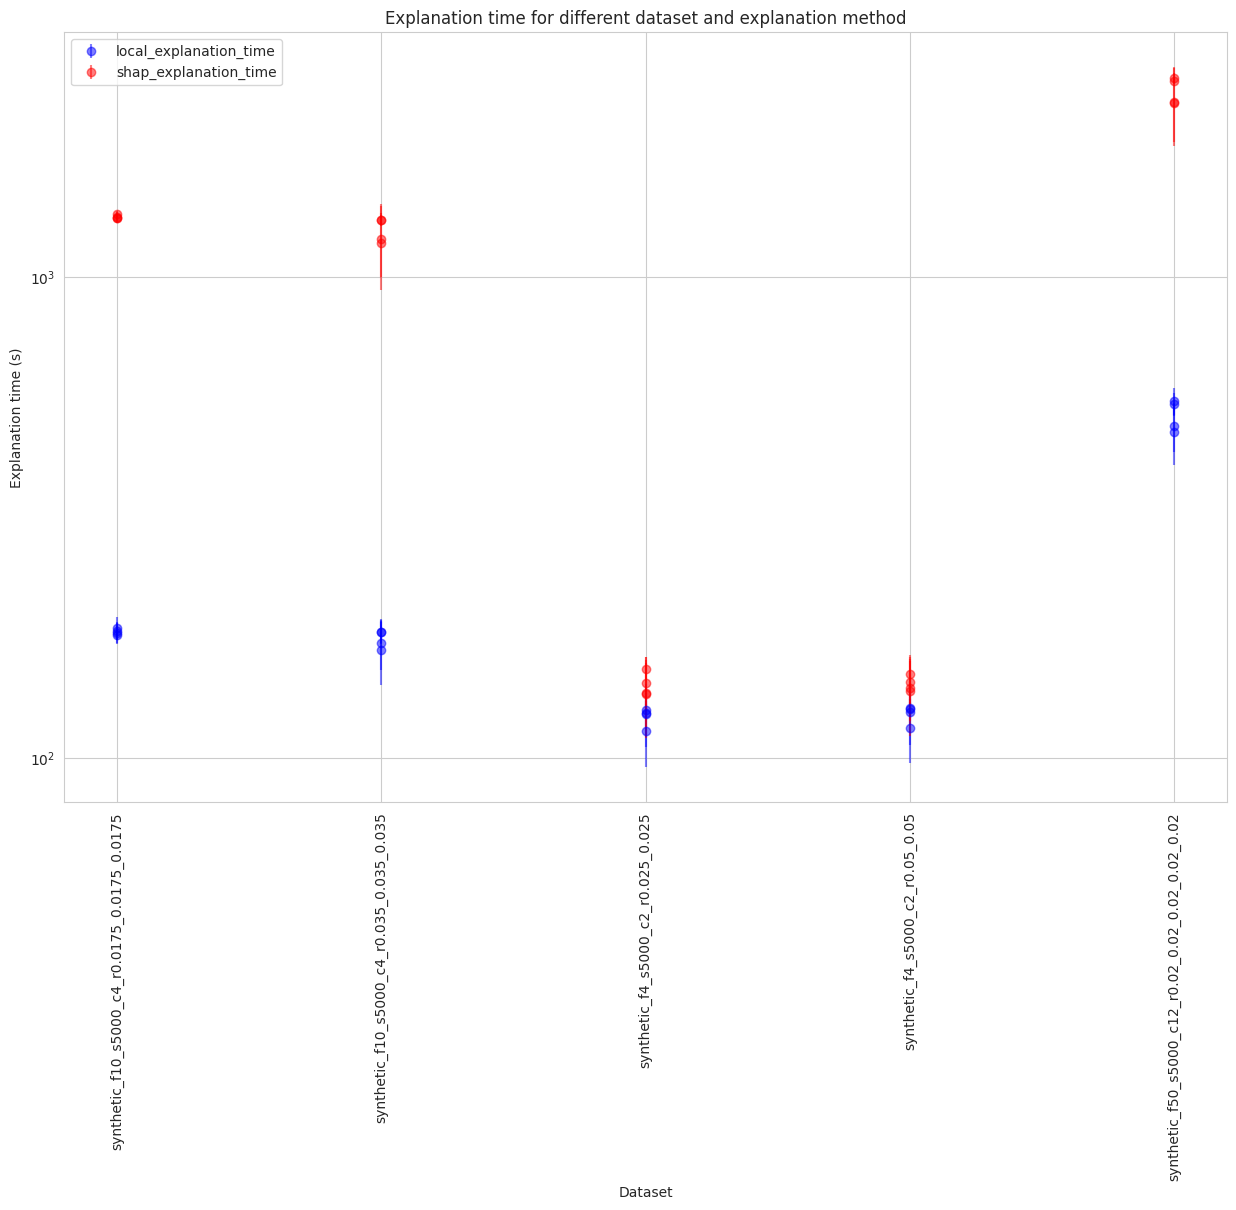

In [8]:
# Same but to compare explanation methods local or shap for different dataset
plt.figure(figsize=(15, 10))
colors= {"local_explanation_time": "blue", "shap_explanation_time": "red"}
for i, dataset_name in enumerate(mean_df["dataset_name"].unique()):
    dataset_mean = mean_df[mean_df["dataset_name"] == dataset_name]
    dataset_std = std_df[std_df["dataset_name"] == dataset_name]
    for j, explanation_method in enumerate(["local_explanation_time", "shap_explanation_time"]):
        experiment_mean = dataset_mean[explanation_method]
        experiment_std = dataset_std[explanation_method]
        label = explanation_method if i == 0 else None
        # One line for each explanation method, one color for each dataset
        plt.errorbar(dataset_mean["dataset_name"], experiment_mean, yerr=experiment_std, label=label, fmt='o', alpha=0.5, color=colors[explanation_method])
plt.legend()
plt.title("Explanation time for different dataset and explanation method")
plt.xlabel("Dataset")
plt.ylabel("Explanation time (s)")
plt.yscale("log")
plt.xticks(rotation=90)

([0, 1, 2, 3, 4],
 [Text(0, 0, 'synthetic_f10_s5000_c4_r0.0175_0.0175_0.0175'),
  Text(1, 0, 'synthetic_f10_s5000_c4_r0.035_0.035_0.035'),
  Text(2, 0, 'synthetic_f4_s5000_c2_r0.025_0.025'),
  Text(3, 0, 'synthetic_f4_s5000_c2_r0.05_0.05'),
  Text(4, 0, 'synthetic_f50_s5000_c12_r0.02_0.02_0.02_0.02_0.02')])

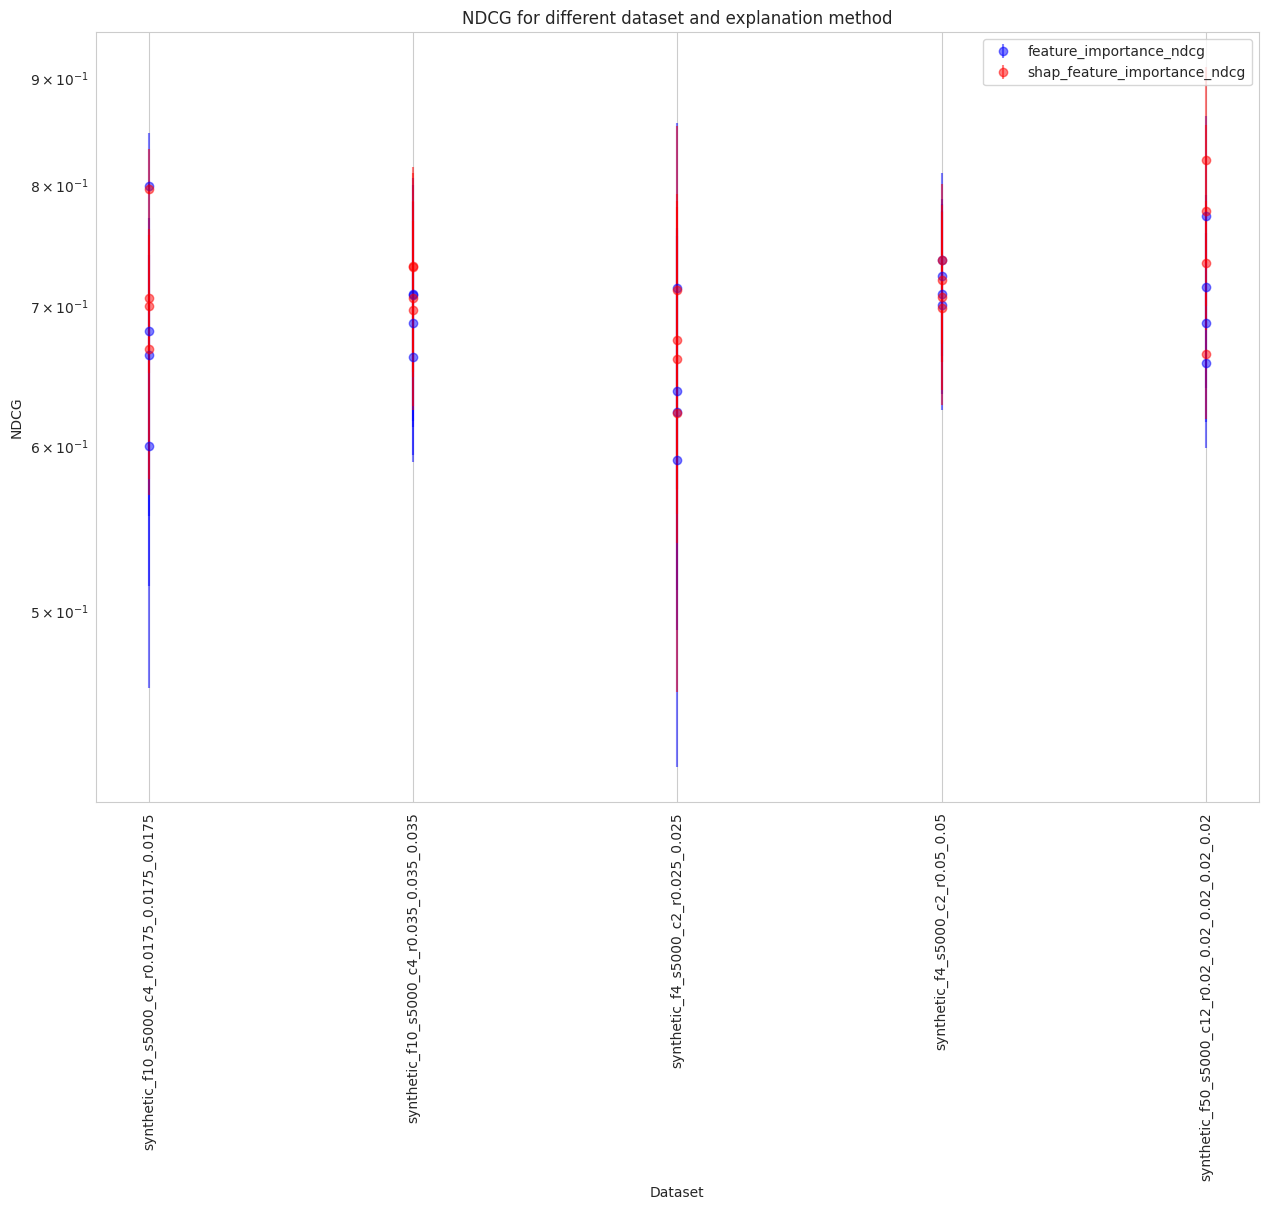

In [9]:
# Same but to compare explanation methods local or shap for different dataset
plt.figure(figsize=(15, 10))
colors= {"feature_importance_ndcg": "blue", "shap_feature_importance_ndcg": "red"}
for i, dataset_name in enumerate(mean_df["dataset_name"].unique()):
    dataset_mean = mean_df[mean_df["dataset_name"] == dataset_name]
    dataset_std = std_df[std_df["dataset_name"] == dataset_name]
    for j, explanation_method in enumerate(["feature_importance_ndcg", "shap_feature_importance_ndcg"]):
        experiment_mean = dataset_mean[explanation_method]
        experiment_std = dataset_std[explanation_method]
        label = explanation_method if i == 0 else None
        # One line for each explanation method, one color for each dataset
        plt.errorbar(dataset_mean["dataset_name"], experiment_mean, yerr=experiment_std, label=label, fmt='o', alpha=0.5, color=colors[explanation_method])
plt.legend()
plt.title("NDCG for different dataset and explanation method")
plt.xlabel("Dataset")
plt.ylabel("NDCG")
plt.yscale("log")
plt.xticks(rotation=90)

([0, 1, 2, 3],
 [Text(0, 0, 'DTECategorical_dataset_sampling_deterministic_0.5_s0'),
  Text(1, 0, 'DTECategorical_dataset_sampling_deterministic_cosine_s0'),
  Text(2, 0, 'DTECategorical_dataset_sampling_deterministic_exponential_s0'),
  Text(3, 0, 'DTECategorical_unsupervised_None_s0')])

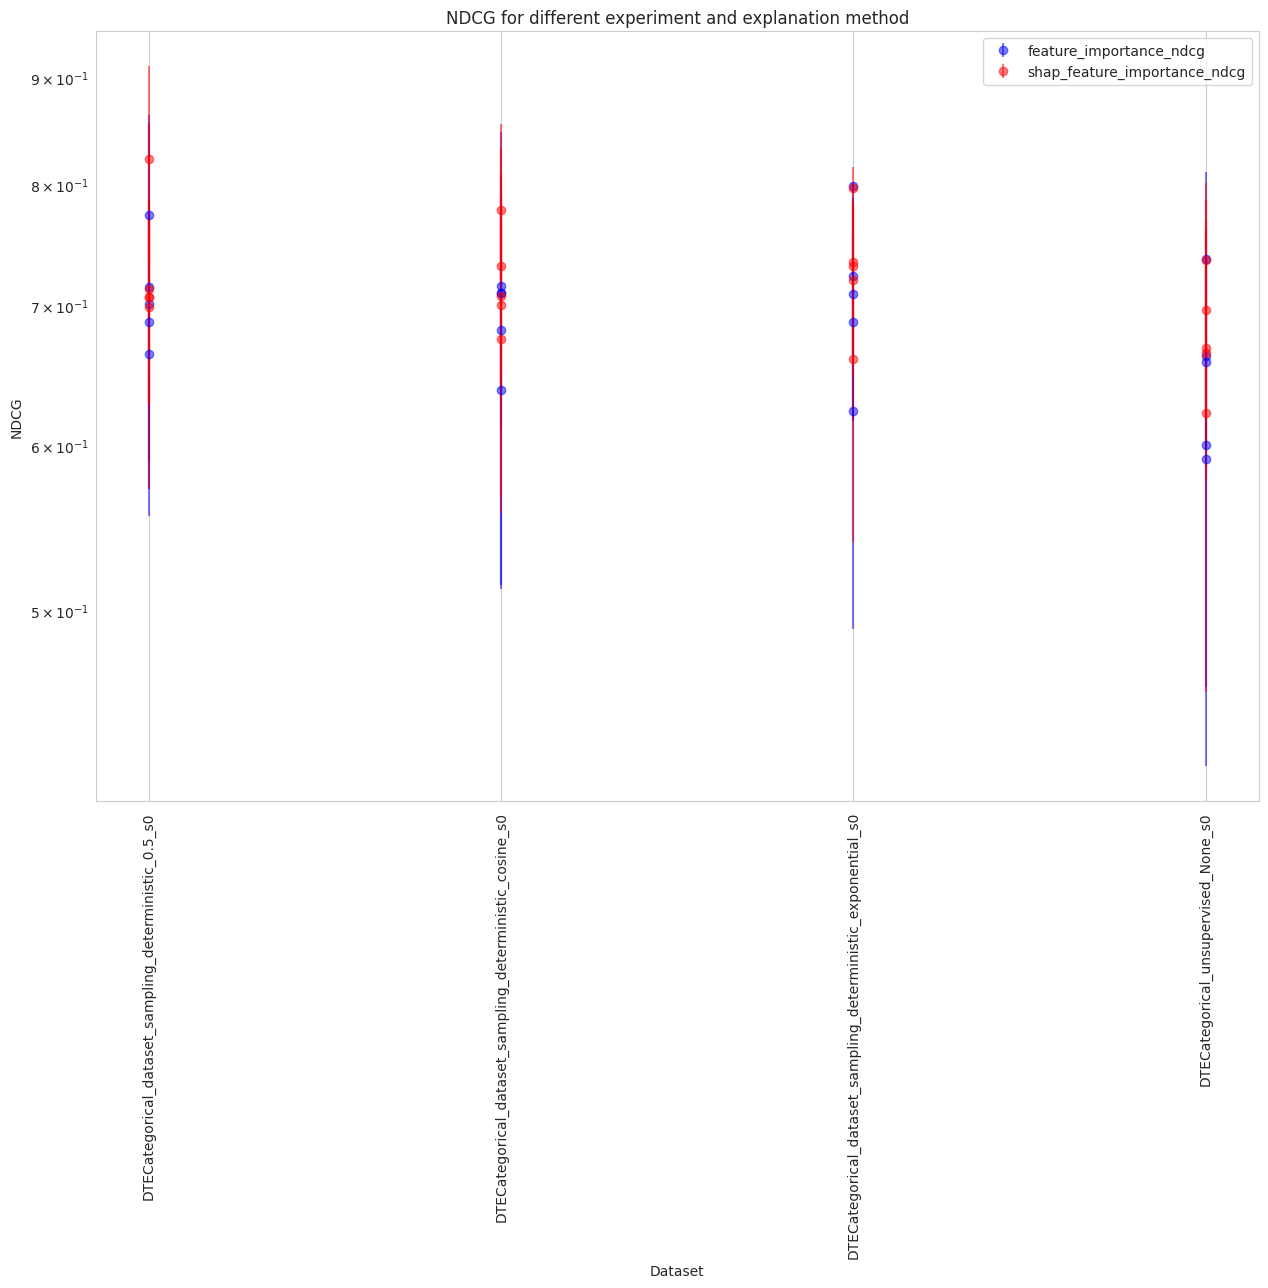

In [10]:
# Same but to compare explanation methods local or shap for different dataset
plt.figure(figsize=(15, 10))
colors= {"feature_importance_ndcg": "blue", "shap_feature_importance_ndcg": "red"}
for i, experiment in enumerate(mean_df["experiment"].unique()):
    dataset_mean = mean_df[mean_df["experiment"] == experiment]
    dataset_std = std_df[std_df["experiment"] == experiment]
    for j, explanation_method in enumerate(["feature_importance_ndcg", "shap_feature_importance_ndcg"]):
        experiment_mean = dataset_mean[explanation_method]
        experiment_std = dataset_std[explanation_method]
        label = explanation_method if i == 0 else None
        # One line for each explanation method, one color for each dataset
        plt.errorbar(dataset_mean["experiment"], experiment_mean, yerr=experiment_std, label=label, fmt='o', alpha=0.5, color=colors[explanation_method])
plt.legend()
plt.title("NDCG for different experiment and explanation method")
plt.xlabel("Dataset")
plt.ylabel("NDCG")
plt.yscale("log")
plt.xticks(rotation=90)


In [11]:
baseline_comp_dataset = pd.DataFrame()
temp_df = full_results_df
temp_df['dataset_name'] = temp_df['dataset_name'] + "_" + temp_df['dataset_version']
for dataset_name in full_results_df["dataset_name"].unique():
    dataset_results = full_results_df[full_results_df["dataset_name"] == dataset_name]
    baseline_results = dataset_results[dataset_results["training_method"] == "unsupervised"]
    dataset_results['f1_score_diff'] = dataset_results['f1_score'] - baseline_results['f1_score'].values[0]
    dataset_results['aucroc_diff'] = dataset_results['aucroc'] - baseline_results['aucroc'].values[0]

    baseline_comp_dataset = pd.concat([baseline_comp_dataset, dataset_results]) 

/tmp/ipykernel_2239396/3038542229.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_results['f1_score_diff'] = dataset_results['f1_score'] - baseline_results['f1_score'].values[0]
/tmp/ipykernel_2239396/3038542229.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_results['aucroc_diff'] = dataset_results['aucroc'] - baseline_results['aucroc'].values[0]
/tmp/ipykernel_2239396/3038542229.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try us

In [12]:
baseline_comp_dataset

,training_time,inference_time,f1_score,dataset_name,training_method,random_seed,aucroc,feature_importance_ndcg,shap_feature_importance_ndcg,global_explanation_time,local_explanation_time,shap_explanation_time,experiment,dataset_version,f1_score_diff,aucroc_diff
0,350.588165,0.055310,0.737143,synthetic_f4_s5000_c2_r0.05_0.05_v3,dataset_sampling,0,0.894189,0.728189,0.729397,7.643598,127.282323,143.261555,DTECategorical_dataset_sampling_deterministic_...,v3,0.007143,0.011788
0,490.450281,0.033537,0.742857,synthetic_f4_s5000_c2_r0.05_0.05_v3,dataset_sampling,0,0.893571,0.729288,0.732277,4.473209,98.534157,110.411481,DTECategorical_dataset_sampling_deterministic_...,v3,0.012857,0.011169
0,423.576120,0.049371,0.741429,synthetic_f4_s5000_c2_r0.05_0.05_v3,dataset_sampling,0,0.893845,0.728025,0.732628,7.298256,137.642788,132.756923,DTECategorical_dataset_sampling_deterministic_...,v3,0.011429,0.011443
0,131.114720,0.049304,0.730000,synthetic_f4_s5000_c2_r0.05_0.05_v3,unsupervised,0,0.882401,0.696142,0.718090,7.865400,120.448710,153.214029,DTECategorical_unsupervised_None_s0,v3,0.000000,0.000000
0,363.094016,0.046633,0.661429,synthetic_f4_s5000_c2_r0.05_0.05_v0,dataset_sampling,0,0.858543,0.643016,0.644302,4.450933,135.875905,158.231997,DTECategorical_dataset_sampling_deterministic_...,v0,-0.041429,-0.012146
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,122.893868,0.040945,0.712381,synthetic_f10_s5000_c4_r0.035_0.035_0.035_v2,unsupervised,0,0.922949,0.622871,0.639711,53.781840,177.558061,1353.394459,DTECategorical_unsupervised_None_s0,v2,0.000000,0.000000
0,363.911325,0.041127,0.615714,synthetic_f4_s5000_c2_r0.025_0.025_v1,dataset_sampling,0,0.867413,0.603802,0.604526,5.373602,134.589061,160.233561,DTECategorical_dataset_sampling_deterministic_...,v1,-0.018571,0.009749
0,516.890887,0.053079,0.681429,synthetic_f4_s5000_c2_r0.025_0.025_v1,dataset_sampling,0,0.886958,0.608871,0.680187,7.305888,125.649150,156.351425,DTECategorical_dataset_sampling_deterministic_...,v1,0.047143,0.029295
0,472.114197,0.049675,0.720000,synthetic_f4_s5000_c2_r0.025_0.025_v1,dataset_sampling,0,0.891020,0.661292,0.719473,5.582620,132.456953,155.560820,DTECategorical_dataset_sampling_deterministic_...,v1,0.085714,0.033357


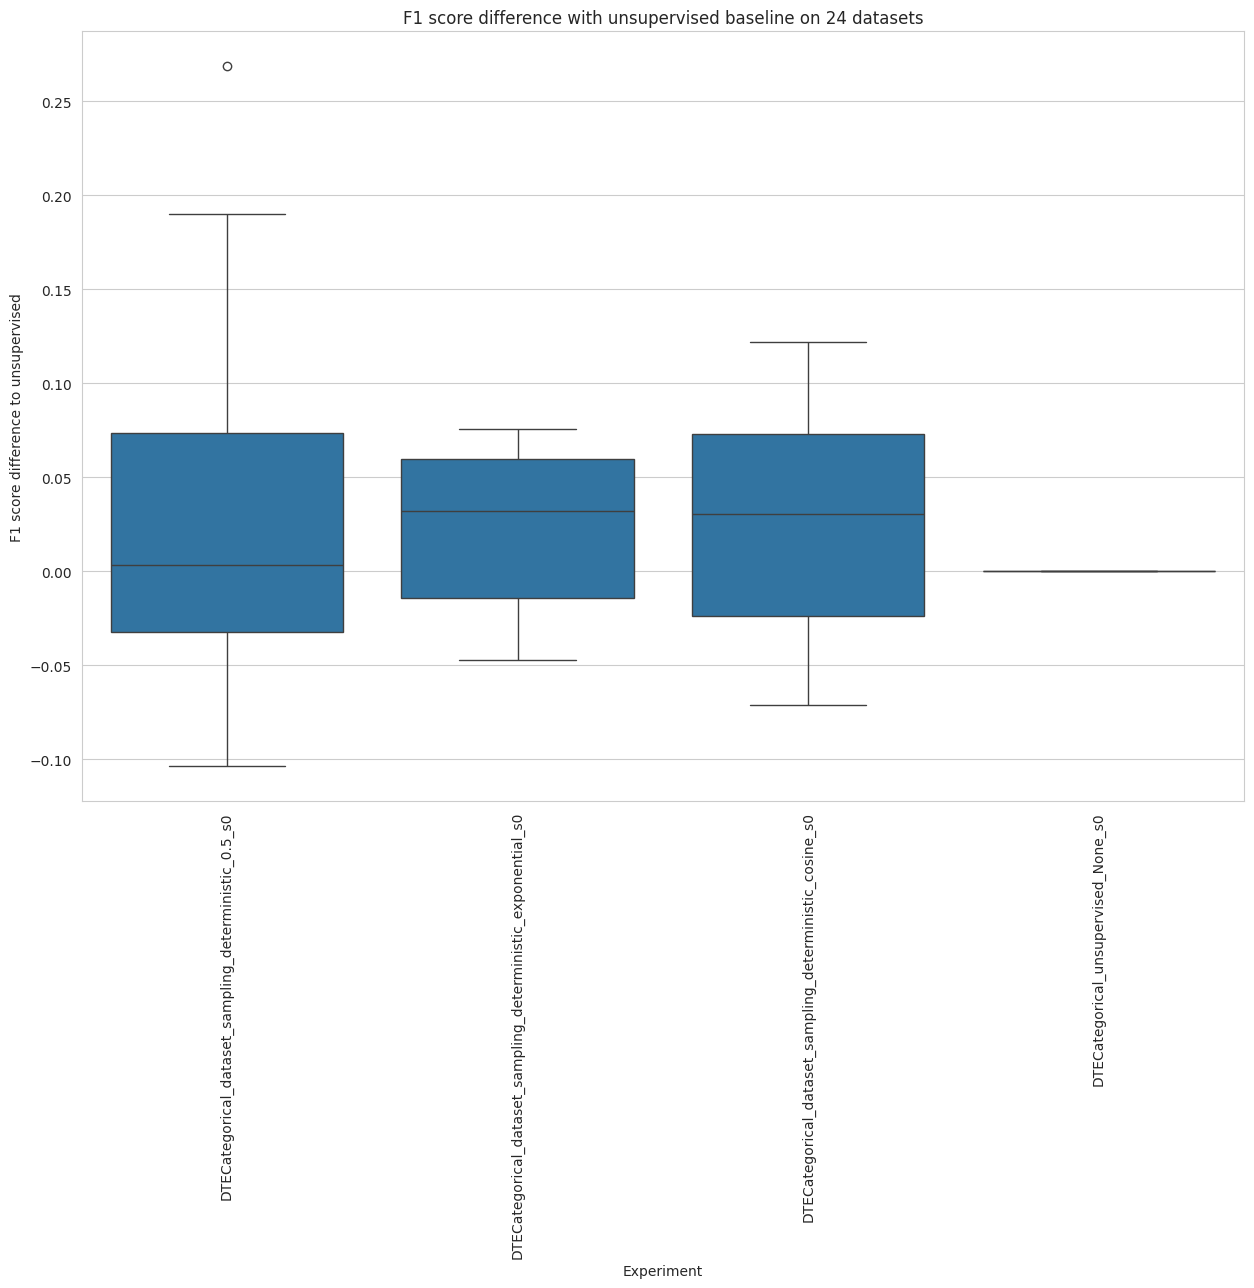

In [13]:
plt.figure(figsize=(15, 10))
sns.boxplot(data=baseline_comp_dataset, x="experiment", y="f1_score_diff")
plt.title(f"F1 score difference with unsupervised baseline on {len(baseline_comp_dataset['dataset_name'].unique())} datasets")
plt.xticks(rotation=90)
plt.ylabel("F1 score difference to unsupervised")
plt.xlabel('Experiment')
plt.show()


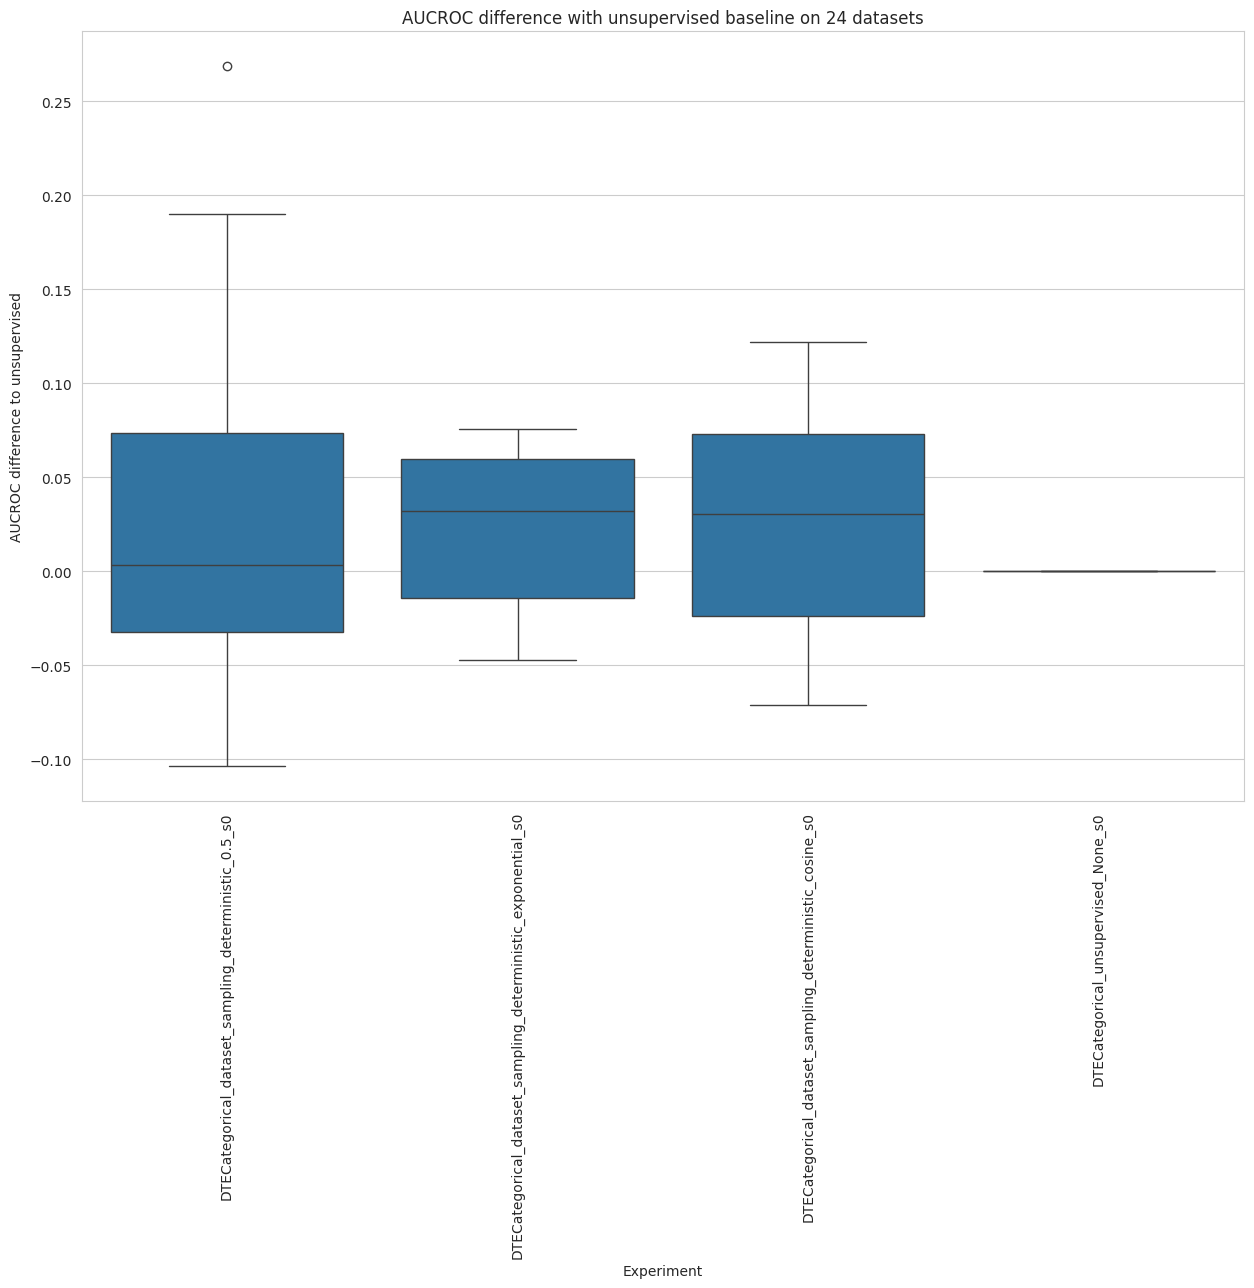

In [14]:
plt.figure(figsize=(15, 10))
sns.boxplot(data=baseline_comp_dataset, x="experiment", y="f1_score_diff")
plt.title(f"AUCROC difference with unsupervised baseline on {len(baseline_comp_dataset['dataset_name'].unique())} datasets")
plt.xticks(rotation=90)
plt.ylabel("AUCROC difference to unsupervised")
plt.xlabel('Experiment')
plt.show()

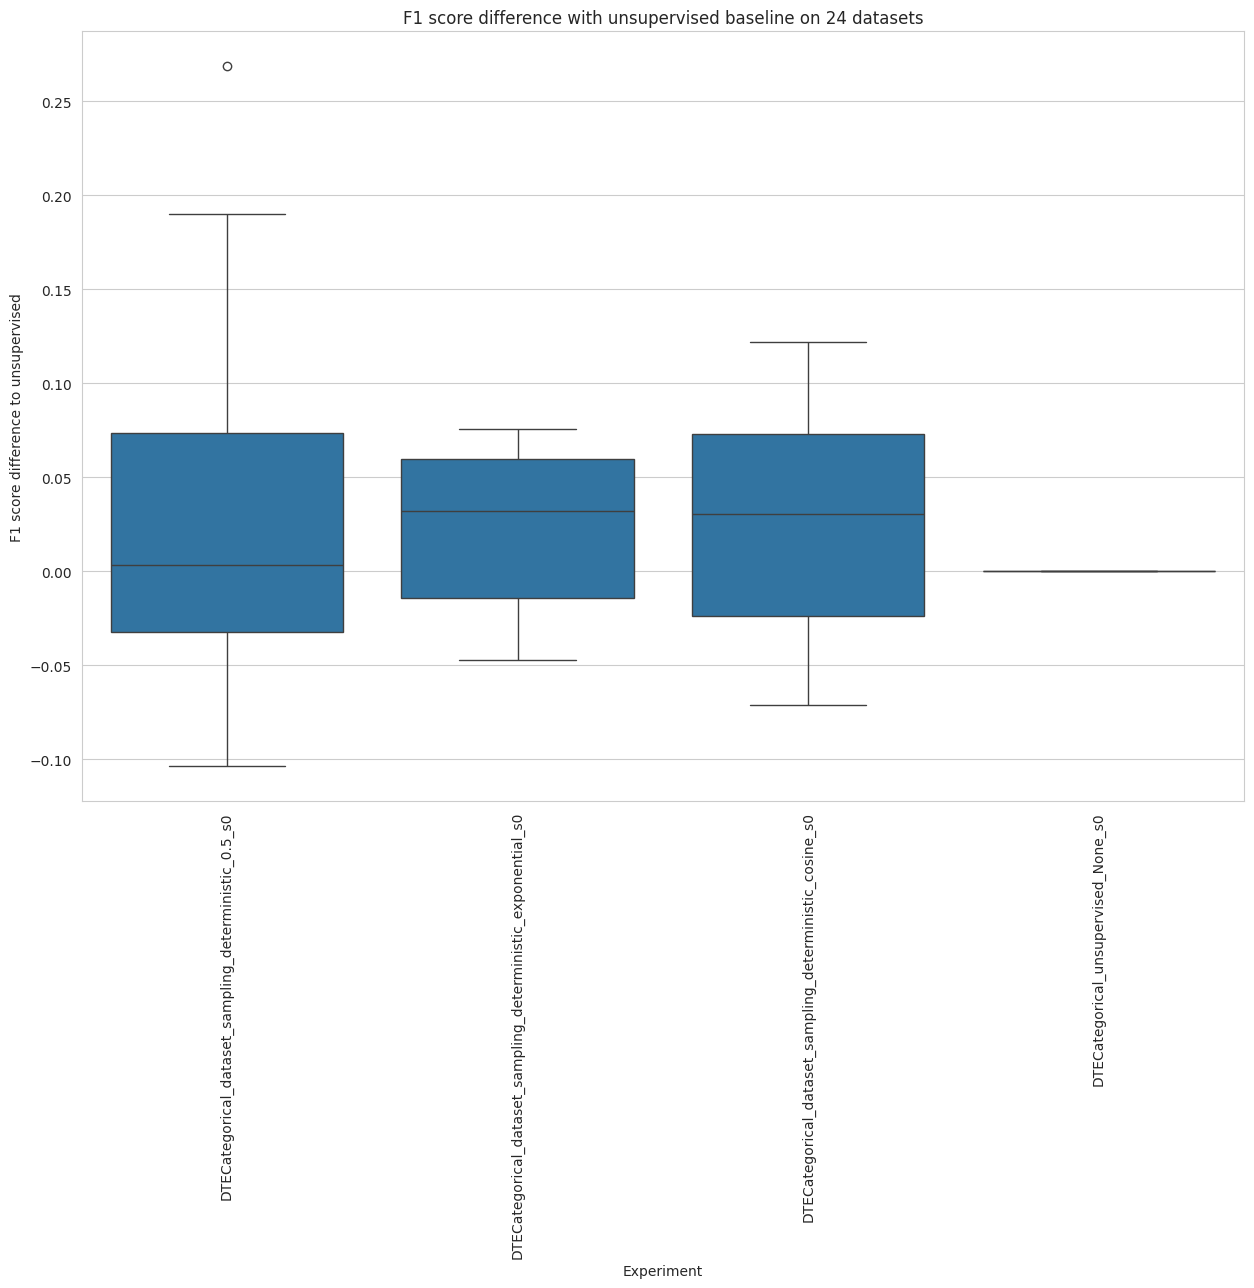

In [15]:
plt.figure(figsize=(15, 10))
sns.boxplot(data=baseline_comp_dataset, x="experiment", y="f1_score_diff")
plt.title(f"F1 score difference with unsupervised baseline on {len(baseline_comp_dataset['dataset_name'].unique())} datasets")
plt.xticks(rotation=90)
plt.ylabel("F1 score difference to unsupervised")
plt.xlabel('Experiment')
plt.show()